# Fourier analysis intruduction

* Fourier transformation 
* Fourier series analysis
* Discrete Fourier analysis
* Fast Fourier transformation

# Continous Fourier transformation

$$ \hat{f}(\omega) = \int_{-\infty}^\infty f(t) e^{-2\pi i \omega t} \,dt$$

* to analyse contiunous integrable function
* mostly for analytic computations and solving differential equations
* spectrum is continous

# Fourier series analysis

* for **periodic** continous functions -> spectrum is discrete

<img src="fourier_series01.svg" style="width: 600px;">
<img src="fourier_series02.svg" style="width: 800px;">


# Discrete Fourier analysis

* for **discrete and periodic** functions (argument $\in [0,1)$)
* spectrum is **discrete and periodic** (argument $\in [0,1)$)

<img src="dft_01.svg" style="width: 700px;">
<img src="dft02.svg" style="width: 600px;">

# Fast Fourier transformation

* fast method for implementing DFT with $O(N \ln N)$ instead of $O(N^2)$
* recursive divide into multiple smaller DFT's: works best if N has small prime factors

<img src="fft01.svg" style="width: 900px;">

In [1]:
import numpy as np
from numpy.fft import fft, ifft

N = 100
x = np.arange(N)
y = np.sin(2*np.pi*x/N)

yk = fft(y)
print(yk[:5])
print(abs(ifft(yk)[:5]))
print(y[:5])

[-1.83430340e-15+0.00000000e+00j -6.81155840e-15-5.00000000e+01j
  1.12084144e-15-2.99328737e-15j -7.88598495e-16-1.99840144e-15j
  1.06835827e-15-1.87714226e-15j]
[1.49699682e-16 6.27905195e-02 1.25333234e-01 1.87381315e-01
 2.48689887e-01]
[0.         0.06279052 0.12533323 0.18738131 0.24868989]


# Exercise

* write a program to do FFT of different functions $f(x)$ with $x\in[0,2\pi)$
* use $N=128$
* for $f$ try $f(x)= \sin(x)$; $f(x)= \cos(x)$; $f(x)= \sin(3x)$; $f(x)=x$
* setup 4 plot spaces; plot the function in the first
* plot real and imaginary part in separate plot spaces
* plot the absolut value in the last plot space

# Observations

* spectrum is complex even if input is real
* spectrum of symmetrical functions is real
* spectrum of asymmetric function is pure imaginary
* jumps in function yield many high frequency components
* spectrum is periodic!

# Exercise

* compute FFT for $f(x)=\sin(x)$ and multiply fourier components by $\exp{(i\pi/2)}$
* compute the inverse tranformation
* plot it's absolute value, real and imaginary part

# Exercise

* compute FFT for $f(x)=\sin(x)$
* multiply only the first half of fourier components by $\exp{(i\pi/2)}$
* multiply the second half of fourier components by $\exp{(-i\pi/2)}$
* compute the inverse tranformation
* plot it's absolute value, real and imaginary part

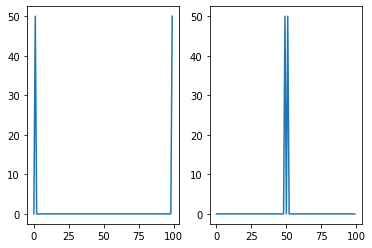

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.fft import fftshift

y = np.sin(2*np.pi*x/N)
yk = fft(y)

ax = plt.subplot(121)
ax.plot(abs(yk))

ykshift = fftshift(yk)
ax2 = plt.subplot(122)
ax2.plot(abs(ykshift))
plt.show()

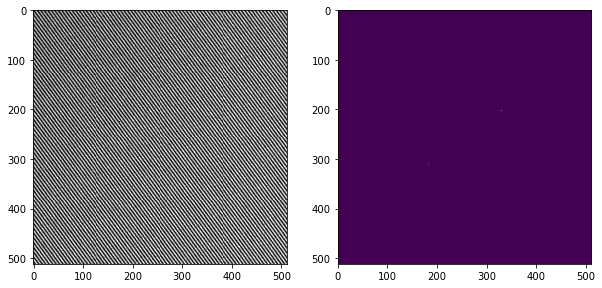

In [3]:
from numpy.fft import fft2
from PIL.Image import open as image_open

img_raw = np.array(image_open("HologramFringes.tif"), dtype=np.uint8)
ftimg = fft2(img_raw)
ftimg = fftshift(ftimg)

fig=plt.figure(figsize=(10, 6))
ax = plt.subplot(121)
ax.imshow(img_raw, interpolation='nearest', cmap=plt.cm.gray)

ax2 = plt.subplot(122)
ax2.imshow(abs(ftimg), interpolation='nearest')
plt.show()

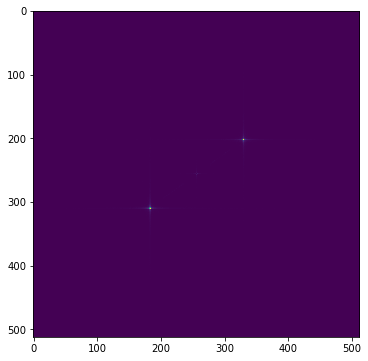

In [4]:
fig=plt.figure(figsize=(6, 6))
img = np.float64(img_raw)
img = img-img.mean()
ftimg = fft2(img)
ftimg = fftshift(ftimg)
ax2 = plt.subplot(111)
ax2.imshow(abs(ftimg), interpolation='nearest')
plt.show()

# Exercise

* take noisy image and try to find features in fourier spectrum